<a href="https://colab.research.google.com/github/FaezeM/NLP_Bambara/blob/main/loading_activatingLabse_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# common_code

In [2]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 5.4 MB/s eta 0:00:00


In [3]:
import os
from google.colab import drive
from pypdf import PdfReader
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from sklearn.model_selection import train_test_split
import random
from google.colab import runtime

In [4]:
drive.mount('/content/drive')
base_drive_path = "/content/drive/MyDrive/NLP_LowResources/materiale_codice/task_encoding_decoding/"
root_data= '/content/drive/MyDrive/NLP_LowResources/Scraping_Dokotoro/'
path_dokotoro_fine = os.path.join(root_data, "dokotoro_complete_final.json")
root_checkpoints=os.path.join(base_drive_path, 'checkpoints')
root_model= os.path.join(base_drive_path, 'modelli_addestrati')

Mounted at /content/drive


In [5]:
path_to_directory = "/content/drive/MyDrive/NLP_LowResources/materiale_codice/bm-frnlb/"

In [6]:
from google.colab import runtime

In [7]:
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [8]:
!pip install psutil

In [9]:
import psutil  #utile per i log dell'utilizzo di memoria
import gc
import torch
import torch.nn as nn
import torch.nn.functional as N
import torch.optim as optim
from torch.optim.lr_scheduler import CyclicLR
from torch.utils.data import DataLoader,Dataset,TensorDataset
from torch.utils.data.dataloader import default_collate
from torch.nn.utils.rnn import pad_sequence
import transformers
from transformers import BertModel, BertTokenizerFast, AutoConfig,AutoTokenizer, AutoModelForSeq2SeqLM, MT5Model,AutoModel
from transformers import AutoModelForSeq2SeqLM, AutoModel
import math
import sys
import time
import os
import numpy as np
from peft import LoraConfig, get_peft_model
import traceback
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from transformers import AutoModelForSeq2SeqLM, AutoModel, BertModel
from peft import get_peft_model, LoraConfig


In [10]:
def load_model_state(model, root_weights, filename):
    #permette il loading del modello già presente in memoria
    model_path = os.path.join(root_weights, filename)

    if os.path.isfile(model_path):
        try:
            # Load dello state dictionary dal file
            state_dict = torch.load(model_path, map_location='cpu')

            # Print della chiave nel dizionario per debugging
            print("Keys in the loaded state dictionary:")
            for key in state_dict.keys():
                print(key)

            # Load del dizionario nel modello
            model.load_state_dict(state_dict, strict=False)

            print(f"Successfully loaded pre-trained model from {model_path}")
            return True
        except Exception as e:
            print(f"Error loading model state: {e}")
            return False
    else:
        print(f"No pre-trained model found at {model_path}")
        return False

In [11]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoModelForSeq2SeqLM
from peft import LoraConfig, get_peft_model
import torch
import numpy as np
from transformers import AutoModelForSeq2SeqLM, AutoModel, XLMRobertaModel

from torch import nn


In [12]:

class GenericLLModel(nn.Module):
    def __init__(self, model_name, use_lora=False, legacy=False, lora_rank=4, dropout_prob=0.1):
        super(GenericLLModel, self).__init__()
        self.use_lora = use_lora
        self.lora_rank = lora_rank

        # LASER or GloT-500 handling
        if model_name == "laser":
            self.model = Laser()  # Load LASER for sentence embedding
            self.model_type = "embedding"
        elif model_name == "glot_500":
            self.model = self.load_glot_500_embeddings()  # Load GloT 500 embeddings
            self.model_type = "embedding"
        elif "t5" in model_name or "bart" in model_name:
            self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
            self.model_type = "encoder-decoder"
        elif "xlm-r" in model_name:  # Specifically handle XLM-R for GloT-500 model
            self.model = AutoModel.from_pretrained(model_name)
            self.model_type = "transformer"
        elif legacy:
            self.model = AutoModel.from_pretrained(model_name)
            self.model_type = "encoder"
        else:
            self.model = AutoModel.from_pretrained(model_name)
            self.model_type = "encoder"

        # Apply dropout to transformer layers if applicable
        if self.model_type != "embedding":
            self.modify_dropout(dropout_prob)

        # Apply LoRA only for transformer-based models
        if self.use_lora and self.model_type in ["encoder-decoder", "transformer"]:
            self.configure_lora()

        print(self.config)
        print(f"**** Model {model_name} initialized, RAM Usage: {self.get_current_ram_usage()} bytes")

    @property
    def config(self):
        return self.model.config if hasattr(self.model, 'config') else None

    def load_glot_500_embeddings(self):
        """Load the GloT 500 multilingual embeddings into a dictionary."""
        from transformers import AutoTokenizer, AutoModel

        # This assumes you have a GloT-500 model hosted on Hugging Face or downloaded locally
        self.tokenizer = AutoTokenizer.from_pretrained("ml6team/glot-500")
        self.glott_model = AutoModel.from_pretrained("ml6team/glot-500")
        return self.glott_model

    def modify_dropout(self, dropout_prob):
        """Adjust dropout probability in the model's layers."""
        for name, module in self.model.named_modules():
            if isinstance(module, nn.Dropout):
                module.p = dropout_prob

    def configure_lora(self):
        """Configure Low-Rank Adaptation (LoRA) if applicable."""
        if self.model_type == "encoder-decoder":
            target_modules = ['q', 'v']
        else:
            target_modules = ['attention.self.query', 'attention.self.key', 'attention.self.value']

        lora_config = LoraConfig(
            r=self.lora_rank,
            lora_alpha=32,
            lora_dropout=0.1,
            target_modules=target_modules,
            bias="none"
        )
        self.model = get_peft_model(self.model, lora_config)
        print("**** LoRA configuration applied")

    def forward(self, input_ids, attention_mask, decoder_input_ids=None, decoder_attention_mask=None, labels=None):
        """Forward pass through the model."""
        if self.model_type == "embedding":
            # Handle LASER or GloT-500 embeddings directly
            return self.get_embeddings(input_ids)  # embeddings as output
        elif self.model_type in ["encoder-decoder", "transformer"]:
            if decoder_attention_mask is None and decoder_input_ids is not None:
                decoder_attention_mask = (decoder_input_ids != self.model.config.pad_token_id).long()

            outputs = self.model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                decoder_input_ids=decoder_input_ids,
                decoder_attention_mask=decoder_attention_mask,
                labels=labels
            )

            logits = outputs.logits
        else:
            outputs = self.model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            logits = outputs.last_hidden_state

        # Validate output
        if torch.isnan(logits).any() or torch.isinf(logits).any():
            print("NaNs or Infs detected in logits")

        return logits

    def get_embeddings(self, input_ids):
        """Get embeddings from LASER or GloT-500."""
        if isinstance(self.model, Laser):
            # LASER model: Get sentence embeddings
            sentences = [input_id for input_id in input_ids]  # Assume input_ids are sentence lists
            return self.model.embed_sentences(sentences)
        elif isinstance(self.model, AutoModel):
            # GloT-500 model: Get word embeddings
            inputs = self.tokenizer(input_ids, return_tensors="pt", padding=True, truncation=True)
            embeddings = self.glott_model(**inputs).last_hidden_state
            return embeddings

    def generate(self, input_ids, attention_mask, **generate_kwargs):
        """Generate sequences from the model."""
        self.model.eval()
        if self.model_type == "encoder-decoder":
            with torch.no_grad():
                generated_tokens = self.model.generate(input_ids=input_ids, attention_mask=attention_mask, **generate_kwargs)
        else:
            print("Not an encoder-decoder model")
            generated_tokens = None

        return generated_tokens

    @staticmethod
    def get_current_ram_usage():
        """Get the current RAM usage of the process."""
        import psutil
        process = psutil.Process()
        return process.memory_info().rss

    def check_parameters(self):
        """Check model parameters for NaNs or Infs."""
        for name, param in self.model.named_parameters():
            if torch.isnan(param).any() or torch.isinf(param).any():
                print(f"NaNs or Infs detected in parameter: {name}")


In [13]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer, BertModel, BertTokenizer
import torch.nn as nn
from transformers.modeling_outputs import BaseModelOutput
import os
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from torch.optim.lr_scheduler import CyclicLR

In [14]:
def align_sentences_to_df(full_path_source, full_path_target):
    with open(full_path_source, 'r', encoding='utf-8') as bm_f, open(full_path_target, 'r', encoding='utf-8') as en_f:
        bm_sentences = bm_f.readlines()
        en_sentences = en_f.readlines()

    if len(bm_sentences) != len(en_sentences):
        print("Warning: The files have different numbers of sentences!")

    df = pd.DataFrame({"BM": [bm.strip() for bm in bm_sentences], "EN": [en.strip() for en in en_sentences]})
    return df


Come attivare la rete...

Il loading del Labse

In [15]:
labse_name = "setu4993/LaBSE"
labse_model = GenericLLModel(labse_name, use_lora=True, legacy=True, lora_rank=4)
labse_path = "LOREB100_eng_fr_bam.pth"
load_model_state(labse_model, root_model, labse_path)
print("student model loaded")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 501153
}

**** Model setu4993/LaBSE initialized, RAM Usage: 1368203264 bytes
No pre-trained model found at /content/drive/MyDrive/NLP_LowResources/materiale_codice/task_encoding_decoding/modelli_addestrati/LOREB100_eng_fr_bam.pth
student model loaded


In [16]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer, BertModel, BertTokenizer
import torch.nn as nn
from transformers.modeling_outputs import BaseModelOutput

labse_name = "setu4993/LaBSE"
t5_model_name = 't5-small'
labse_tokenizer = BertTokenizer.from_pretrained(labse_name)
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
labse_model.eval()
t5_model.eval()

def extract_labse_embeddings(input_text):
    inputs = labse_tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
    if "token_type_ids" in inputs:
        del inputs["token_type_ids"]
    with torch.no_grad():
        outputs = labse_model(**inputs)
    return outputs.last_hidden_state, inputs['attention_mask']

class BERTEnhancedT5(nn.Module):
    def __init__(self, bert_model, t5_model, input_dim=768, t5_dim=512):
        super().__init__()
        self.bert = bert_model
        self.t5 = t5_model
        self.proj = nn.Linear(input_dim, t5_dim)

    def forward(self, input_text, decoder_prompt="translate English to French: "):

        inputs = labse_tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
        if "token_type_ids" in inputs:
            del inputs["token_type_ids"]
        with torch.no_grad():
            bert_outputs = self.bert(**inputs)
        print(bert_outputs)
        print(bert_outputs.size())
        bert_embed = bert_outputs#.last_hidden_state  # (B, T, 768)  <- al contrario dei labse normali nel genericmodel mio non c'è l'attributo hidden state
        attention_mask = inputs['attention_mask']

        t5_encoder_hidden_states = self.proj(bert_embed)  # (B, T, 512)

        # Step 3: Tokenize decoder input
        decoder_input = t5_tokenizer(decoder_prompt, return_tensors="pt")
        decoder_input_ids = decoder_input.input_ids

        with torch.no_grad():

          output_ids = self.t5.generate(
              encoder_outputs=BaseModelOutput(last_hidden_state=t5_encoder_hidden_states),
              attention_mask=attention_mask,
              decoder_input_ids=decoder_input_ids,
              max_length=64
          )


        return t5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Example usage
bert_t5 = BERTEnhancedT5(labse_model, t5_model)

input_text = "How are you"
print("\n=== BERT-enhanced T5 Translation ===")
translated = bert_t5(input_text)
print("Input:", input_text)
print("Output:", translated)


tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/13.6M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



=== BERT-enhanced T5 Translation ===
tensor([[[-0.3312,  1.5400, -1.2503,  ..., -0.3524,  0.3932, -0.4086],
         [ 0.4465,  1.1982, -0.6024,  ...,  0.0649, -0.3242, -0.5540],
         [ 0.3502,  0.9511, -0.7029,  ...,  0.1168, -0.3125, -0.5759],
         [ 0.2855,  0.8989, -0.8726,  ...,  0.1872, -0.3039, -0.6624],
         [-0.3312,  1.5400, -1.2503,  ..., -0.3524,  0.3932, -0.4086]]])
torch.Size([1, 5, 768])
Input: How are you
Output: translate English to French:


In [30]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def run_pca_and_plot(embeddings_en, embeddings_fr, embeddings_bam, title="LaBSE EN/FR/BAM Alignment"):
    # Ensure all embeddings are 3D (batch_size, seq_len, hidden_size)
    def flatten_embeddings(embeddings):
        if embeddings.dim() == 3:
            return embeddings.mean(dim=1)
        elif embeddings.dim() == 2:
            return embeddings
        else:
            raise ValueError(f"Invalid embedding shape: {embeddings.shape}")

    # Flatten all
    en = flatten_embeddings(embeddings_en)
    fr = flatten_embeddings(embeddings_fr)
    bam = flatten_embeddings(embeddings_bam)

    # Trim to the smallest number of samples to match lengths
    min_len = min(len(en), len(fr), len(bam))
    en, fr, bam = en[:min_len], fr[:min_len], bam[:min_len]

    # Stack all into one array
    X = torch.cat([en, fr, bam], dim=0).numpy()
    y = [0] * min_len + [1] * min_len + [2] * min_len  # 0 = EN, 1 = FR, 2 = BAM

    # PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'orange']
    labels = ['English', 'French', 'Bambara']
    for i, color in enumerate(colors):
        idx = [j for j, label in enumerate(y) if label == i]
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=color, label=labels[i], alpha=0.6)

    plt.legend()
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()


In [18]:
import zipfile

zip_path = "/content/drive-download-20250419T143409Z-001.zip"
extract_path = "/content/fr_test_data_extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive-download-20250419T143409Z-001.zip'

In [ ]:
zip_path = "/content/drive-download-20250419T143931Z-001.zip"
extract_path = "/content/en_test_data_extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [19]:
zip_path = "/content/dataset-20250419T135918Z-001.zip"
extract_path = "/content/dokotoro"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [20]:
import csv

with open(os.path.join("/content/dokotoro/dataset/test_eng_bam.csv"), mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    en_sentences = [row[0] for row in reader]

with open(os.path.join("/content/dokotoro/dataset/test_fra_bam.csv"), mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    fr_sentences = [row[0] for row in reader]

with open(os.path.join("/content/dokotoro/dataset/test_fra_bam.csv"), mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    bam_sentences = [row[1] for row in reader]

bam_sentences[:10]

['Mɔgɔ min man girin walimaa man kɛnɛ barisa a tɛ balo nafama sɔrɔ ka dun walima a tɛ dumuni caman sɔrɔ, a bɛ fɔ ko o tigi balocogo man ɲi walima balodɛsɛ bɛ a la. Balodɛsɛ bɛ o tigi degun.',
 'Dan',
 'Woro ɲuguɲugulen man ca\xa0yan.',
 'Sɔgɔsɔgɔninjɛ ye bana ye min yɛlɛma ka teli. A banakisɛ bɛ jɛnsɛn fiɲɛ fɛ ni banabagatɔ sɔgɔsɔgɔra. Mɔgɔ minnu ni banabagatɔ bɛ so kelen kɔnɔ, kɛrɛn\xadkɛrɛnnenya la denmisɛnw; bana in ka teli ka olu minɛ.',
 'Aw ye bilasiralikanw matarafa balodɛsɛ kunbɛncogo\xa0kan.',
 'Dɔgɔtɔrɔ dɔw bɛ pikiri sɛbɛn mɔgɔw ka furaw la ka a sɔrɔ a ɲɛci tɛ yen. O bɛɛ kɔfɛ, u bɛ tila ka pikiri kɛ wari minɛ. U tɛ pikiri gɛlɛyaw ni a kɔlɔlɔw jate dugumisɛnw kɔnɔ.',
 'Kɔnɔboli bɛ taa ka segin, tumadɔ la kɔnɔ bɛ\xa0ja.',
 'Jolimisɛnniw (chancre mou)',
 'Fangasɔrɔdumuniw nafa ka bon kosɛbɛ: misali la maoloseri, alikamaseri, pɔmutɛri, walima bananku. Ni a’ ye sukaro ni tulu dɔɔni kɛ a nin dumuni kofɔlenw na, o bɛ dɔ fara u fanga kan. A’ ye a ɲinin banabagatɔ fɛ, a ka minfɛn suka

In [21]:
bam_sentences = [s.replace('\xa0', ' ') for s in bam_sentences]
bam_sentences[:10]

['Mɔgɔ min man girin walimaa man kɛnɛ barisa a tɛ balo nafama sɔrɔ ka dun walima a tɛ dumuni caman sɔrɔ, a bɛ fɔ ko o tigi balocogo man ɲi walima balodɛsɛ bɛ a la. Balodɛsɛ bɛ o tigi degun.',
 'Dan',
 'Woro ɲuguɲugulen man ca yan.',
 'Sɔgɔsɔgɔninjɛ ye bana ye min yɛlɛma ka teli. A banakisɛ bɛ jɛnsɛn fiɲɛ fɛ ni banabagatɔ sɔgɔsɔgɔra. Mɔgɔ minnu ni banabagatɔ bɛ so kelen kɔnɔ, kɛrɛn\xadkɛrɛnnenya la denmisɛnw; bana in ka teli ka olu minɛ.',
 'Aw ye bilasiralikanw matarafa balodɛsɛ kunbɛncogo kan.',
 'Dɔgɔtɔrɔ dɔw bɛ pikiri sɛbɛn mɔgɔw ka furaw la ka a sɔrɔ a ɲɛci tɛ yen. O bɛɛ kɔfɛ, u bɛ tila ka pikiri kɛ wari minɛ. U tɛ pikiri gɛlɛyaw ni a kɔlɔlɔw jate dugumisɛnw kɔnɔ.',
 'Kɔnɔboli bɛ taa ka segin, tumadɔ la kɔnɔ bɛ ja.',
 'Jolimisɛnniw (chancre mou)',
 'Fangasɔrɔdumuniw nafa ka bon kosɛbɛ: misali la maoloseri, alikamaseri, pɔmutɛri, walima bananku. Ni a’ ye sukaro ni tulu dɔɔni kɛ a nin dumuni kofɔlenw na, o bɛ dɔ fara u fanga kan. A’ ye a ɲinin banabagatɔ fɛ, a ka minfɛn sukaromaw cam

In [23]:
en_sentences = en_sentences[:500]
fr_sentences = fr_sentences[:500]
bam_sentences = bam_sentences[:500]

In [24]:
def extract_labse_embeddings_edit(input_text):
    inputs = labse_tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
    if "token_type_ids" in inputs:
        del inputs["token_type_ids"]
    with torch.no_grad():
        outputs = labse_model(**inputs)

    # Use outputs directly (no need for last_hidden_state)
    embeddings = outputs  # Directly use the output without referencing last_hidden_state
    return embeddings, inputs['attention_mask']

In [25]:
en_embeddings, _ = extract_labse_embeddings_edit(en_sentences)
fr_embeddings, _ = extract_labse_embeddings_edit(fr_sentences)
bam_embeddings, _ = extract_labse_embeddings_edit(bam_sentences)

In [27]:

save_path = "/content/drive/MyDrive/embeddings"
os.makedirs(save_path, exist_ok=True)

In [28]:
np.save(os.path.join(save_path, "en_embeddings.npy"), en_embeddings.numpy())
np.save(os.path.join(save_path, "fr_embeddings.npy"), fr_embeddings.numpy())
np.save(os.path.join(save_path, "bam_embeddings.npy"), bam_embeddings.numpy())

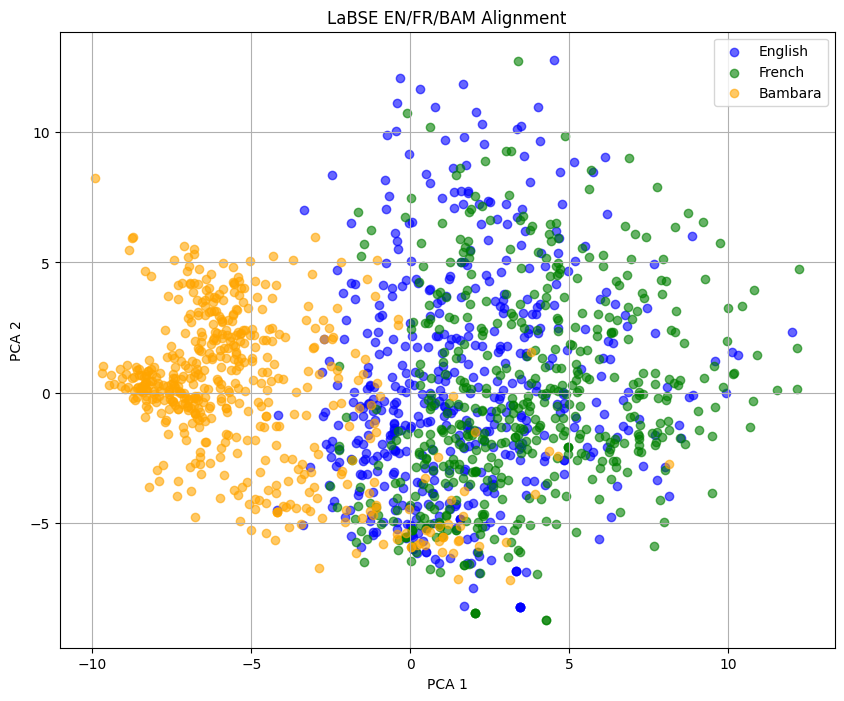

In [31]:
run_pca_and_plot(en_embeddings, fr_embeddings, bam_embeddings, title="LaBSE EN/FR/BAM Alignment")